In [1]:
import pandas as pd

from helpers import swatch
from converters import hex_to_xyz, xyz_to_lab
from metrics import rgb_euclidean, rgb_gamma_correction

# Displaying colored DataFrame

In [2]:
def display_colored(df):
    display(df.style.applymap(lambda c:"background-color: {}".format(c), subset=['rgb']))

In [3]:
display_colored(pd.read_csv('dmc.csv', index_col='number')[150:160])

,name,rgb
number,,
598,Light Turquoise,#90c3cc
600,Very Dark Cranberry,#cd2f63
601,Dark Cranberry,#d1286a
602,Medium Cranberry,#e24874
603,Cranberry,#ffa4be
604,Light Cranberry,#ffb0be
605,Very Light Cranberry,#ffc0cd
606,Bright Orange-Red,#fa3203
608,Bright Orange,#fd5d35


# Swatching

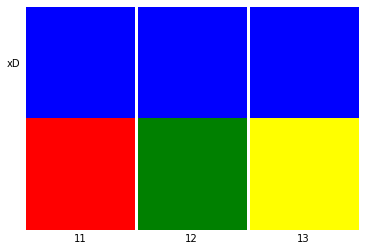

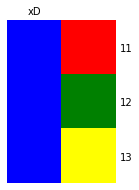

In [4]:
swatch('blue', ['red', 'green', 'yellow'], base_label='xD', compared_labels=['11', '12', '13'])
swatch('blue', ['red', 'green', 'yellow'], vertical=True, size=1, whitespace=0, base_label='xD', compared_labels=['11', '12', '13'])

# Conversions

## RGB -> XYZ

$C \in \{R, G, B\}\\
a=0.055$

$C_{\mathrm {linear} }={\begin{cases}{\frac {C}{12.92}},&C\leq 0.04045\\\left({\frac {C+a}{1+a}}\right)^{2.4},&C>0.04045\end{cases}}$

${\begin{bmatrix}X_{D65}\\Y_{D65}\\Z_{D65}\end{bmatrix}}={\begin{bmatrix}0.4124&0.3576&0.1805\\0.2126&0.7152&0.0722\\0.0193&0.1192&0.9505\end{bmatrix}}{\begin{bmatrix}R_{\mathrm {linear} }\\G_{\mathrm {linear} }\\B_{\mathrm {linear} }\end{bmatrix}}$

In [5]:
hex_to_xyz('c72b3b')

array([0.25206482, 0.14185635, 0.05547244])

## XYZ -> Lab

For illuminant D65:

${\begin{aligned}X_{\mathrm {n} }&=95.0489,\\Y_{\mathrm {n} }&=100,\\Z_{\mathrm {n} }&=108.8840\end{aligned}}$

${\begin{aligned}f(t)&={\begin{cases}{\sqrt[{3}]{t}}&{\text{if }}t>\delta ^{3}\\{\dfrac {t}{3\delta ^{2}}}+{\frac {4}{29}}&{\text{otherwise}}\end{cases}}\\\delta &={\tfrac {6}{29}}\end{aligned}}$

${\begin{aligned}L^{\star }&=116\ f\!\left({\frac {Y}{Y_{\mathrm {n} }}}\right)-16\\a^{\star }&=500\left(f\!\left({\frac {X}{X_{\mathrm {n} }}}\right)-f\!\left({\frac {Y}{Y_{\mathrm {n} }}}\right)\right)\\b^{\star }&=200\left(f\!\left({\frac {Y}{Y_{\mathrm {n} }}}\right)-f\!\left({\frac {Z}{Z_{\mathrm {n} }}}\right)\right)\end{aligned}}$

In [6]:
xyz_to_lab(hex_to_xyz('c72b3b'))

[1.2813883786910694, 4.802228555186666, 1.4158445318654955]